In [5]:
# Ensure fresh imports
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

# Add project root to sys.path
sys.path.append(str(Path.cwd().parents[1]))

from src.data.load_data import load_raw_data

train_df, store_df = load_raw_data()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<string>:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


Data loaded from: /home/brice-nelson/Documents/computerScience/medium_posts/pencils_and_python/elasticity_risk_exposure/data/raw


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB
train_df info: 
 None
train_df describe: 
               Store     DayOfWeek                           Date  \
count  1.017209e+06  1.017209e+06                        1017209   
mean   5.584297e+02  3.998341e+00  2014-04-11 01:30:42.8

<Axes: ylabel='Frequency'>

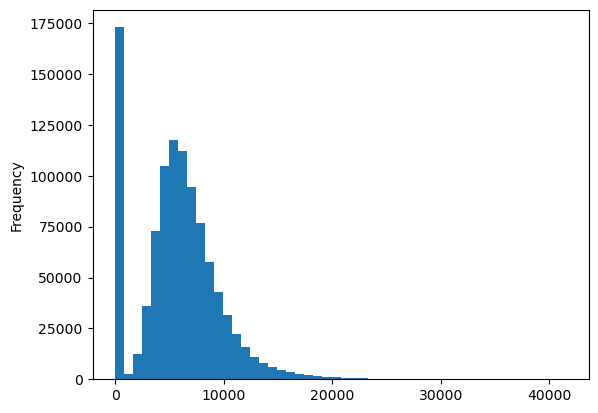

In [6]:
# Quick sanity checks
print(f"train_df info: \n",train_df.info())
print(f"train_df describe: \n",train_df.describe())
print(f"train_df isnull sum: \n",train_df.isnull().sum())

# Column 7 investigation (mixed types)
train_df.iloc[:, 7].value_counts(dropna=False)

# Unique holiday flags
train_df["StateHoliday"].value_counts()

# Date range
print(train_df["Date"].min(), train_df["Date"].max())

# Sales distribution
train_df["Sales"].plot.hist(bins=50)


In [11]:
# Detailed exploration of the StateHoliday column to understand mixed types
print("StateHoliday column exploration:")
print(f"Unique values and their counts:\n{train_df['StateHoliday'].value_counts(dropna=False)}\n")
print(f"Data types in the column:\n{train_df['StateHoliday'].apply(type).value_counts()}\n")
print("Preview of distinct values with their types:")
print(train_df['StateHoliday'].drop_duplicates().apply(lambda x: (x, type(x))).tolist())

StateHoliday column exploration:
Unique values and their counts:
StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

Data types in the column:
StateHoliday
<class 'str'>    886137
<class 'int'>    131072
Name: count, dtype: int64

Preview of distinct values with their types:
[('0', <class 'str'>), ('a', <class 'str'>), ('b', <class 'str'>), ('c', <class 'str'>), (0, <class 'int'>)]


In [ ]:
# Investigate StateHoliday column for mixed types and inconsistencies
print("StateHoliday Column Investigation:")

# Count unique values and their occurrences
print("Value counts (including NaN):")
print(train_df['StateHoliday'].value_counts(dropna=False))

# Check for unique data types in the column
print("\nData types in StateHoliday column:")
print(train_df['StateHoliday'].map(type).value_counts())

# Check the unique values along with their types
print("\nUnique values with data types:")
print(train_df['StateHoliday'].drop_duplicates().apply(lambda x: (x, type(x))).tolist())

# Check if any values are empty strings or unexpected
print("\nCheck for empty strings or unexpected values:")
print(train_df['StateHoliday'].unique())

In [8]:
# Shows all the distinct values in the StateHoliday column and their counts.
# You might find values like '0', 'a', 'b', 'c', etc.—these usually indicate different holiday types, but you need to normalize them (e.g., '0' vs 0 vs 'None')
train_df["StateHoliday"].value_counts()


StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [9]:
# returns earliest and latest dates in dataset
"""Why it's useful:
Helps define your time range (good for time series)

Useful when slicing for training/testing splits or plotting"""
print(train_df["Date"].min(), train_df["Date"].max())


2013-01-01 00:00:00 2015-07-31 00:00:00


<Axes: ylabel='Frequency'>

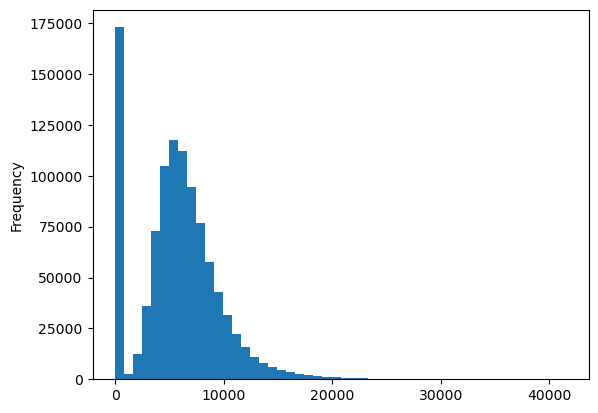

In [10]:
"""What it does:
Plots a histogram of the Sales column, split into 50 bins (groups).

🔍 Why it's useful:
See how sales are distributed (bell curve? skewed? lots of zeros?)

Spot outliers visually"""

train_df["Sales"].plot.hist(bins=50)
